## 簡單線性迴歸模型

* y = β0+β1x     <br> β0：截距(Intercept)，β1：斜率(Slope)為 x變動一個單位y變動的量


* 優點 : 快速,不需參數,容易理解
* 缺點 : 相較其他複雜模型，其預測率不是太高


#### 模型績效評估指標 
* 平均絕對誤差(Mean Absolute Error, MAE)
* 均方誤差(Mean Squared Error, MSE)
* 均方根誤差(Root Mean Squared Error, RMSE)

#### Example 1 珍奶銷售量預測

In [13]:
import numpy as np
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31, 25, 29, 32, 31, 24, 33, 25, 31, 26, 30])
bubbleTea_sales = np.array([77, 62, 93, 84, 59, 64, 80, 75, 58, 91, 51, 73, 65, 84])

print(temperatures)
print(temperatures.shape)
print(bubbleTea_sales)
print(bubbleTea_sales.shape)

# 轉換維度
temperatures = np.reshape(temperatures, (len(temperatures), 1))
#temperatures = temperatures.reshape(-1,1)

bubbleTea_sales = np.reshape(bubbleTea_sales, (len(bubbleTea_sales), 1)) 
#bubbleTea_sales =bubbleTea_sales.reshape(-1,1)
print("----")
print(temperatures)
print(temperatures.shape)
print(bubbleTea_sales)
print(bubbleTea_sales.shape)


[29 28 34 31 25 29 32 31 24 33 25 31 26 30]
(14,)
[77 62 93 84 59 64 80 75 58 91 51 73 65 84]
(14,)
----
[[29]
 [28]
 [34]
 [31]
 [25]
 [29]
 [32]
 [31]
 [24]
 [33]
 [25]
 [31]
 [26]
 [30]]
(14, 1)
[[77]
 [62]
 [93]
 [84]
 [59]
 [64]
 [80]
 [75]
 [58]
 [91]
 [51]
 [73]
 [65]
 [84]]
(14, 1)


In [2]:
Linear = LinearRegression()
Linear.fit(temperatures,bubbleTea_sales)

# 印出係數
print(Linear.coef_)

# 印出截距
print(Linear.intercept_ )

[[3.73788546]]
[-36.36123348]


In [3]:
# 新的氣溫資料進行預測
to_be_predicted = np.array([31]).reshape(-1,1)
print(to_be_predicted)

predicted_sales = Linear.predict(to_be_predicted)

# 預測的珍珠奶銷量
print(predicted_sales)

[[31]]
[[79.51321586]]


In [4]:
import matplotlib.pyplot as plt

# 視覺化
plt.scatter(temperatures, bubbleTea_sales, color='black',)
plt.plot(temperatures, Linear.predict(temperatures), color='blue', linewidth=2)
plt.plot(to_be_predicted, predicted_sales, color = 'red', marker = '^', markersize = 10)
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
# 模型績效
mse = np.mean((Linear.predict(temperatures) - bubbleTea_sales) ** 2)
r_squared = Linear.score(temperatures,bubbleTea_sales)

# 印出模型績效
print("MSE = ",mse)
print("R-Square = ",r_squared)

MSE =  27.934864694776564
R-Square =  0.8225092881166945


#### Example 2 廣告投入費用與產品銷售量預測

In [7]:
import pandas as pd

data = pd.read_csv('data/Advertising.csv', index_col=0)
data

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [8]:
data.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


特徵 (X)

* TV：用於電視廣告上的費用(以千為單位)
* Radio：用於廣播電台廣告上的費用 (以千為單位)
* Newspaper：用於報章雜誌的費用 (以千為單位)

Target (Y)
* Sales：產品銷售數量

In [9]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
#X = data[['TV', 'radio', 'newspaper']]
X

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4
...,...,...,...
196,38.2,3.7,13.8
197,94.2,4.9,8.1
198,177.0,9.3,6.4
199,283.6,42.0,66.2


In [10]:
y = data[['sales']]
#y = data.sales
y

,sales
1,22.1
2,10.4
3,9.3
4,18.5
5,12.9
...,...
196,7.6
197,9.7
198,12.8
199,25.5


In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# default split is 75% for training and 25% for testing
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 3)
(150, 1)
(50, 3)
(50, 1)


In [16]:
from sklearn.linear_model import LinearRegression

linear = LinearRegression()

linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
print(linear.intercept_)
print(linear.coef_)

[2.87696662]
[[0.04656457 0.17915812 0.00345046]]


In [18]:
y_pred = linear.predict(X_test)
y_pred

array([[21.70910292],
       [16.41055243],
       [ 7.60955058],
       [17.80769552],
       [18.6146359 ],
       [23.83573998],
       [16.32488681],
       [13.43225536],
       [ 9.17173403],
       [17.333853  ],
       [14.44479482],
       [ 9.83511973],
       [17.18797614],
       [16.73086831],
       [15.05529391],
       [15.61434433],
       [12.42541574],
       [17.17716376],
       [11.08827566],
       [18.00537501],
       [ 9.28438889],
       [12.98458458],
       [ 8.79950614],
       [10.42382499],
       [11.3846456 ],
       [14.98082512],
       [ 9.78853268],
       [19.39643187],
       [18.18099936],
       [17.12807566],
       [21.54670213],
       [14.69809481],
       [16.24641438],
       [12.32114579],
       [19.92422501],
       [15.32498602],
       [13.88726522],
       [10.03162255],
       [20.93105915],
       [ 7.44936831],
       [ 3.64695761],
       [ 7.22020178],
       [ 5.9962782 ],
       [18.43381853],
       [ 8.39408045],
       [14

In [19]:
from sklearn import metrics
import numpy as np

#calculate MSE using scikit-learn
print("MSE:",metrics.mean_squared_error(y_test, y_pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE:",metrics.mean_absolute_error(y_test, y_pred))



MSE: 1.9730456202283397
RMSE: 1.404651423032896
MAE: 1.0668917082595215


In [20]:
#特徵選擇
feature_cols = ['TV', 'radio']

X = data[feature_cols]
y = data.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

linear.fit(X_train, y_train)

y_pred = linear.predict(X_test)

print("MSE : ", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MSE :  1.3879034699382888


#### EXample3 波士頓房價預測 


In [21]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [22]:
X = boston.data
Y = boston.target
X.shape # 樣本數 :506 , 特徵欄位數 : 13 

(506, 13)

In [23]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

變數|中文說明|英文說明
------|------|------
CRIM|城鎮人均犯罪率|per capita crime rate by town
ZN|城鎮超過2500平方英尺的住宅區域占地比例|proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS|城鎮非零售用地占地比例|proportion of non-retail business acres per town
CHAS|是否靠近河邊(1:是,0:否)|Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
NOX|一氧化碳濃度|nitric oxides concentration (parts per 10 million)
RM|每套房產平均房間個數|average number of rooms per dwelling
AGE|在1940年之前建好的,且業主自住房子的比例|proportion of owner-occupied units built prior to 1940
DIS|與波士頓中心距離|weighted distances to five Boston employment centres
RAD|周邊高速公路便利性指數|index of accessibility to radial highways
TAX|每10000美元的財產稅率|full-value property-tax rate per $10,000
PTRATIO|城鎮老師比例|teacher ratio by town
B|城鎮黑人比例|1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LISTAT|地位較低的人口比例|\% lower status of the population


In [24]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [25]:
import time
from sklearn.linear_model import LinearRegression
model = LinearRegression()
start = time.clock()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
train_score = model.score(X_train,y_train)
cv_score = model.score(X_test,y_test) 

In [27]:
# Result : 欠擬合 
print('elaspe:{0:.6f};train_score:{1:0.6f};cv_soce:{2:.6f}'.format(time.clock()-start,train_score,cv_score))

elaspe:0.581730;train_score:0.723941;cv_soce:0.795262


### 過擬合 (OverFitting) & 欠擬合 (UnderFitting)

* OverFitting : Model能夠很好的Fit訓練樣本,但對於新數據的預測準確性很差 => 高方差 
* UnderFitting : Model不能很好的Fit訓練樣本,對於新數據的預測準確性也不好 => 高偏差

In [28]:
import matplotlib.pyplot as plt
import numpy as np

n_dots = 20

x = np.linspace(0, 1, n_dots)                   # [0, 1]之間建立 20個點
y = np.sqrt(x) + 0.2*np.random.rand(n_dots) - 0.1;

In [29]:
def plot_polynomial_fit(x, y, order):
    p = np.poly1d(np.polyfit(x, y, order))    
    t = np.linspace(0, 1, 200)
    plt.plot(x, y, 'ro', t, p(t), '-', t, np.sqrt(t), 'r--')
    return p

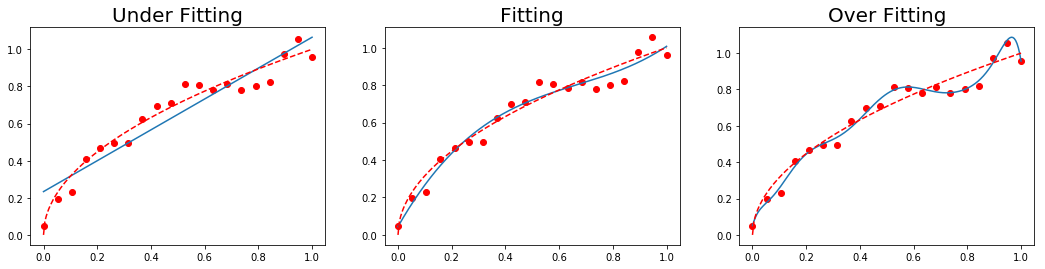

In [30]:
plt.figure(figsize=(18, 4))
titles = ['Under Fitting', 'Fitting', 'Over Fitting']

for index, order in enumerate([1, 3, 10]):
    plt.subplot(1, 3, index + 1)
    plot_polynomial_fit(x, y, order)
    plt.title(titles[index], fontsize=20)

### 模型優化


In [31]:
from sklearn.datasets import load_boston

boston = load_boston()
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [32]:
X = boston.data
Y = boston.target
X.shape # 樣本數 :506 , 特徵欄位數 : 13 

(506, 13)

In [33]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=3)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

#多項式特徵
#生成一個新的特徵矩陣，該特徵矩陣由度數小於或等於指定度數的特徵的所有多項式組合組成。
#例如，如果輸入樣本是二維的並且形式為[a，b]，則2次多項式特徵是[1，a，b，a ^ 2，ab，b ^ 2]

def polynomial_model(degree=1):
    polynomial_features = PolynomialFeatures(degree=degree,
                                             include_bias=False)
    linear_regression = LinearRegression(normalize=True)
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    return pipeline

model = polynomial_model(degree=2)

start = time.clock()
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
cv_score = model.score(X_test, y_test)
print('elaspe: {0:.6f}; train_score: {1:0.6f}; cv_score: {2:.6f}'.format(time.clock()-start, train_score, cv_score))

elaspe: 0.025370; train_score: 0.930547; cv_score: 0.860049
